In [2]:
import numpy as np
from mbipy.numpy.phase_retrieval.implicit import lcs_df
import matplotlib.pyplot as plt
from mbipy.numpy.normal_integration.fourier import frankot_chellappa, kottler

ImportError: cannot import name 'create_antisym' from 'mbipy.src.normal_integration' (c:\Users\clement.capdeville\Documents\GitHub\MoBI_plugin\napari_env\Lib\site-packages\mbipy\src\normal_integration\__init__.py)

In [12]:
rng = np.random.default_rng(0)
ref = rng.random((10, 100,101))
sample = rng.random((10, 100,101))

In [13]:
results = lcs_df(ref, sample,alpha=1e-5,weak_absorption=True)

In [14]:
results.shape

(100, 101, 4)

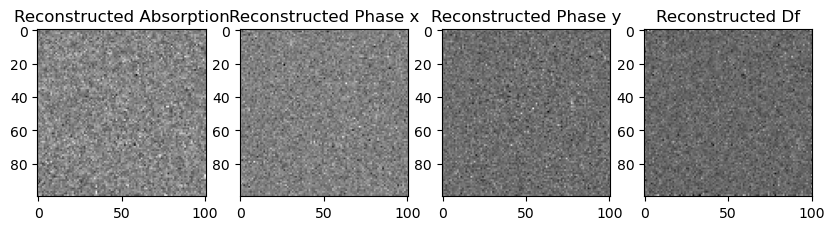

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(results[..., 0], cmap='gray')
plt.title('Reconstructed Absorption')
plt.subplot(1, 4, 2)
plt.imshow(results[..., 1], cmap='gray')
plt.title('Reconstructed Phase x')
plt.subplot(1, 4, 3)
plt.imshow(results[..., 2], cmap='gray')
plt.title('Reconstructed Phase y')
plt.subplot(1, 4, 4)
plt.imshow(results[..., 3], cmap='gray')
plt.title('Reconstructed Df')
plt.show()


In [16]:
FC = frankot_chellappa(gx=results[..., 2], gy=results[..., 1])
K = kottler(gx=results[..., 2], gy=results[..., 1])


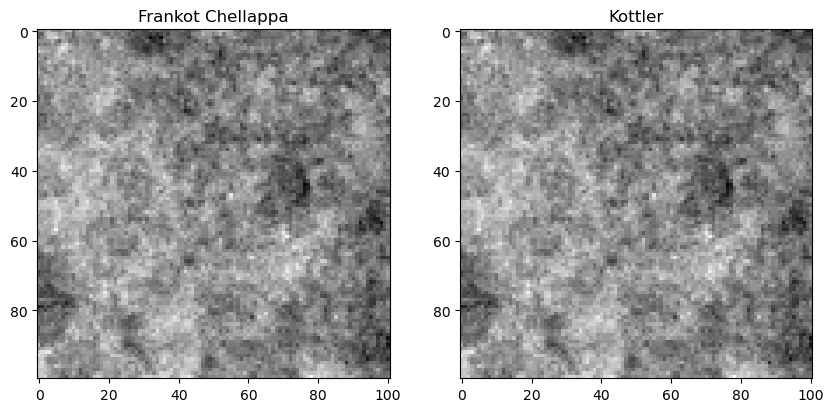

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(FC, cmap='gray')
plt.title('Frankot Chellappa')
plt.subplot(1, 2, 2)
plt.imshow(K, cmap='gray')
plt.title('Kottler')
plt.show()

# si ca ne fonctionne toujours pas essaye ceci 

In [18]:
from mbipy.src.normal_integration import create_antisym, create_frankot_chellappa

In [19]:
antisym = create_antisym(np)
frankot_chellappa = create_frankot_chellappa(np, antisym)


In [20]:
FC_2 = frankot_chellappa(gx=results[..., 2], gy=results[..., 1])


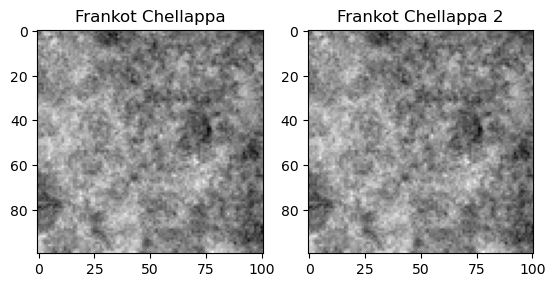

In [21]:
plt.Figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(FC, cmap='gray')
plt.title('Frankot Chellappa')
plt.subplot(1, 2, 2)
plt.imshow(FC_2, cmap='gray')
plt.title('Frankot Chellappa 2')
plt.show()